<a href="https://colab.research.google.com/github/tylerscott3/CS290/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal is to identify the age of an abalone with:     'Shucked weight': 0.5123,
          'Whole weight': 1.1524,
   


In [130]:
pip install ucimlrepo

In [131]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [132]:
import pandas as pd
import numpy as np
import math

In [133]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
dtypes: float64(7), object(1)
memory usage: 261.2+ KB


In [134]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rings   4177 non-null   int64
dtypes: int64(1)
memory usage: 32.8 KB


In [135]:
df= pd.concat([X,y], axis=1)
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [136]:
df.nunique()

,0
Sex,3
Length,134
Diameter,111
Height,51
Whole_weight,2429
Shucked_weight,1515
Viscera_weight,880
Shell_weight,926
Rings,28


In [137]:
df["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [138]:
features = df.columns[ df.columns != "Rings" ]
features

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')

DECISION TREE REGRESSOR

In [139]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [141]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [142]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [143]:
train_set.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [144]:
test_set = test_set[["Height", "Whole_weight", "Shucked_weight", "Shell_weight", "Viscera_weight", "Rings"]]

In [145]:
train_set = train_set[["Height", "Whole_weight", "Shucked_weight", "Shell_weight", "Viscera_weight", "Rings"]]

In [146]:
X_train = train_set[["Height", "Whole_weight", "Shucked_weight", "Shell_weight", "Viscera_weight"]]
y_train = train_set["Rings"]

In [147]:
X_test = test_set[["Height", "Whole_weight", "Shucked_weight", "Shell_weight", "Viscera_weight"]]
y_test = test_set["Rings"]

In [148]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 2052 to 3693
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height          836 non-null    float64
 1   Whole_weight    836 non-null    float64
 2   Shucked_weight  836 non-null    float64
 3   Shell_weight    836 non-null    float64
 4   Viscera_weight  836 non-null    float64
dtypes: float64(5)
memory usage: 39.2 KB


In [149]:
df['Age'] = pd.cut(df['Rings'], bins=[0, 8, 11, np.inf], labels=['young', 'middle-aged', 'old'])

In [150]:
priors = df["Age"].value_counts( normalize=True )
priors

,proportion
Age,
middle-aged,0.433325
young,0.336845
old,0.229830


In [151]:
df["Whole_weight"].mean()

0.8287421594445774

In [152]:
df["Whole_weight_cat"] = (df["Whole_weight"] > 0.8287421594445774)*1

In [153]:
df["Whole_weight_cat"].value_counts(normalize=True)

,proportion
Whole_weight_cat,
0,0.521427
1,0.478573


In [154]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Whole_weight_cat
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,old,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,young,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,middle-aged,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,middle-aged,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,young,0


<ipython-input-155-a8947d15450c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age","Whole_weight_cat"]).size().unstack().plot(kind='bar',stacked=True);


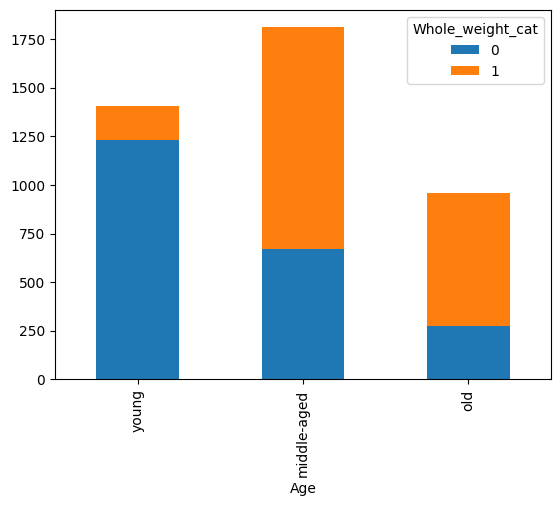

In [155]:
df.groupby(["Age","Whole_weight_cat"]).size().unstack().plot(kind='bar',stacked=True);

In [156]:
df.groupby(["Age","Whole_weight_cat"]).size().unstack()

<ipython-input-156-e78c3df56133>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age","Whole_weight_cat"]).size().unstack()


Whole_weight_cat,0,1
Age,,
young,1230,177
middle-aged,673,1137
old,275,685


In [157]:
df.groupby(["Age","Whole_weight_cat"]).size().unstack().sum()

<ipython-input-157-7359b97f9dee>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age","Whole_weight_cat"]).size().unstack().sum()


,0
Whole_weight_cat,
0,2178
1,1999


In [158]:
673/(1230+673+275)

0.30899908172635443

In [159]:
df.groupby(["Age","Whole_weight_cat"]).size().unstack() / df.groupby(["Age","Whole_weight_cat"]).size().unstack().sum()

<ipython-input-159-728aee36872c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age","Whole_weight_cat"]).size().unstack() / df.groupby(["Age","Whole_weight_cat"]).size().unstack().sum()
<ipython-input-159-728aee36872c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age","Whole_weight_cat"]).size().unstack() / df.groupby(["Age","Whole_weight_cat"]).size().unstack().sum()


Whole_weight_cat,0,1
Age,,
young,0.564738,0.088544
middle-aged,0.308999,0.568784
old,0.126263,0.342671


The first column shows the conditional probabilities we need:

𝑃(Young|Below average weight)  = 56.47%
𝑃(Middle-Aged|Below average weight)  = 30.89%
𝑃(Old|Below average weight)  = 12.62%

In [160]:
df.groupby(["Whole_weight_cat","Age"]).size().unstack() / df.groupby(["Whole_weight_cat","Age"]).size().unstack().sum()

<ipython-input-160-60d433535cd2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Whole_weight_cat","Age"]).size().unstack() / df.groupby(["Whole_weight_cat","Age"]).size().unstack().sum()
<ipython-input-160-60d433535cd2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Whole_weight_cat","Age"]).size().unstack() / df.groupby(["Whole_weight_cat","Age"]).size().unstack().sum()


Age,young,middle-aged,old
Whole_weight_cat,,,
0,0.8742,0.371823,0.286458
1,0.1258,0.628177,0.713542


<ipython-input-161-5587de86c47e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.hist( "Shucked_weight", by = "Age", bins = 20, edgecolor="white");


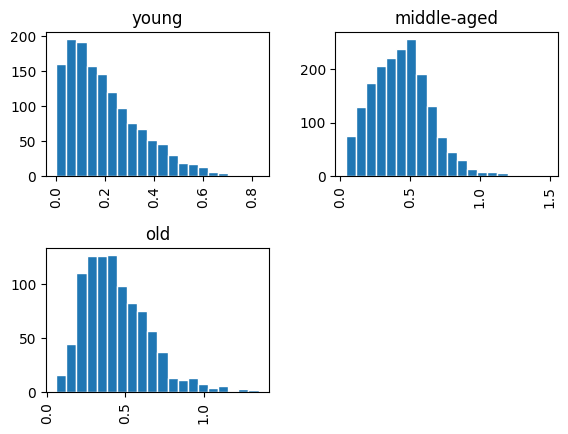

In [161]:
df.hist( "Shucked_weight", by = "Age", bins = 20, edgecolor="white");

In [162]:
df[ df["Shucked_weight"] == 0.5 ]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Whole_weight_cat
2525,M,0.59,0.455,0.16,1.090,0.5,0.2215,0.292,9,middle-aged,1
3701,M,0.66,0.510,0.18,1.261,0.5,0.2335,0.339,10,middle-aged,1


In [163]:
df.groupby("Age")["Shucked_weight"].mean()

<ipython-input-163-380a98a57962>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age")["Shucked_weight"].mean()


,Shucked_weight
Age,
young,0.198199
middle-aged,0.439923
old,0.443698


In [164]:
df.groupby("Age")["Shucked_weight"].std()

<ipython-input-164-74fa9d60c2ce>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age")["Shucked_weight"].std()


,Shucked_weight
Age,
young,0.147031
middle-aged,0.208437
old,0.208357


In [165]:
from scipy.stats import norm

In [166]:
Shucked_weight_likelihoods = norm.pdf( x=0.5123, loc=df.groupby("Age")["Shucked_weight"].mean(), scale = df.groupby("Age")["Shucked_weight"].std())
Shucked_weight_likelihoods

<ipython-input-166-34981b9213d5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Shucked_weight_likelihoods = norm.pdf( x=0.5123, loc=df.groupby("Age")["Shucked_weight"].mean(), scale = df.groupby("Age")["Shucked_weight"].std())


array([0.27701241, 1.80199698, 1.81368763])

In [167]:
priors*Shucked_weight_likelihoods

,proportion
Age,
middle-aged,0.120036
young,0.606993
old,0.416840


In [168]:
import seaborn as sns

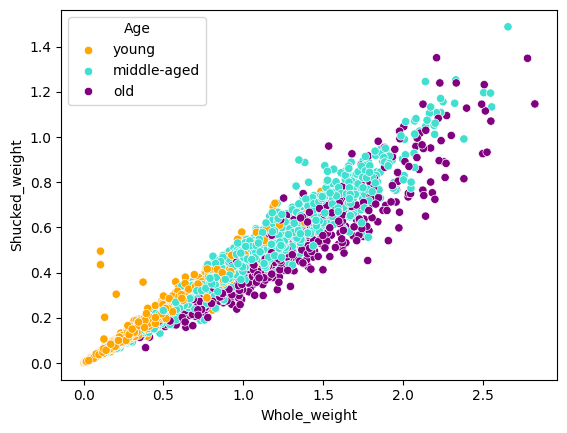

In [169]:
sns.scatterplot( x = "Whole_weight", y = "Shucked_weight", hue = "Age", data = df, palette = ["orange","turquoise","purple"]);

In [170]:
Weight_likelihoods = norm.pdf( x=1.1524, loc=df.groupby("Age")["Whole_weight"].mean(), scale = df.groupby("Age")["Whole_weight"].std())
Weight_likelihoods

<ipython-input-170-ea95419090bd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Weight_likelihoods = norm.pdf( x=1.1524, loc=df.groupby("Age")["Whole_weight"].mean(), scale = df.groupby("Age")["Whole_weight"].std())


array([0.08183726, 0.86622903, 0.87121394])

In [171]:
priors*Weight_likelihoods

,proportion
Age,
middle-aged,0.035462
young,0.291785
old,0.200231


In [172]:
priors*Shucked_weight_likelihoods*Weight_likelihoods

,proportion
Age,
middle-aged,0.009823
young,0.525795
old,0.363157


END RESULT IS THAT AN ABALONE WITH THE SHUCKED WEIGHT AND WHOLE WEIGHT OF .5123 and 1.1524 respectively is most likely middle-aged.

SECOND PART OF HW WITH PREVIOUSLY USED DATASET FROM HW 1

In [173]:
pip install ucimlrepo

In [174]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [175]:
import pandas as pd
import math

In [176]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [177]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [178]:
df= pd.concat([X,y], axis=1)
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


In [179]:
features = df.columns[ df.columns != "y" ]
features

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [180]:
target = "y"
attribute = "marital"

In [181]:
vals = df[ attribute].unique()
vals

array(['married', 'single', 'divorced'], dtype=object)

In [182]:
props = df[ df[attribute] == vals[1] ][target].value_counts( normalize=True )
props

,proportion
y,
no,0.850508
yes,0.149492


In [183]:
entropy = 0
for p in props.array:
  entropy = entropy - p*math.log2(p)
entropy

0.6085670475765929

In [184]:
entropy = 0
for i in range(len(props)):
  entropy = entropy - props.iloc[i]*math.log2( props.iloc[i] )
entropy

0.6085670475765929

In [185]:
entropy = 0
overall = len( df )
for val in vals:
  subset_size = len(df[ df[attribute] == val ])
  weight = subset_size / overall
  props = df[ df[attribute] == val ][target].value_counts( normalize=True )
  for p in props.array:
    entropy =  entropy - weight*(p*math.log2(p))

entropy

0.5175998043005658

In [186]:
target = "y"
feature = "age"

In [187]:
vals = df[ "age" ].unique()
vals.sort()
vals

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 92, 93, 94, 95])

In [188]:
overall = len( df )
entropies = []
for val in vals:
  entropy = 0
  left = df[ df[feature] <= val ][ [feature,target] ]
  props = left[ target ].value_counts( normalize = True )
  weight = len( left ) / overall
  for prop in props.array:
    entropy = entropy - weight*prop*math.log2( prop )
  right = df[ df[feature] > val ][ [feature,target] ]
  props = right[ target ].value_counts( normalize = True )
  weight = len( right ) / overall
  for prop in props.array:
    entropy = entropy - weight*prop*math.log2( prop )
  entropies.append(entropy)

In [189]:
pd.Series( entropies ).idxmin()


42

In [190]:

vals[3]

21

In [191]:
entropies[3]

0.519869064367314

In [192]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [193]:
train_set.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [194]:
train_set = train_set[["marital", "age", "poutcome", "balance", "y"]]
test_set = test_set[["marital", "age", "poutcome", "balance", "y"]]

In [196]:
X_train = train_set[["marital", "age", "poutcome", "balance"]]
y_train = train_set["y"]
X_test = train_set[["marital", "age", "poutcome", "balance"]]
y_test = train_set["y"]

In [197]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 6318 to 40494
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   marital   36168 non-null  object
 1   age       36168 non-null  int64 
 2   poutcome  6628 non-null   object
 3   balance   36168 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


In [198]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [204]:
cat_attributes = ["marital",  "poutcome"]
num_attributes = ["age", "balance"]

In [205]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [206]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])

In [207]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.89480232, 0.890517  , 0.89120818, 0.89271395, 0.89257569])

In [208]:
df["prediction"] = (df["age"] > 25).map({True: 'yes', False: 'no'})

In [209]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'poutcome'])])),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [210]:
test_predictions = pipeline.predict(X_test)

In [211]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix( y_test, test_predictions )
cm

array([[31511,   436],
       [ 3438,   783]])

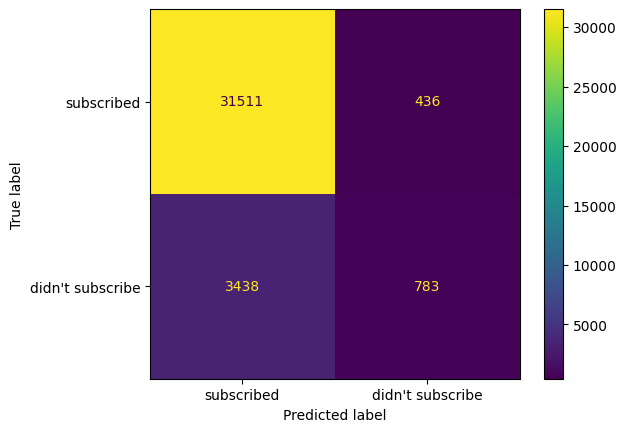

In [212]:
ConfusionMatrixDisplay( cm, display_labels=["subscribed","didn't subscribe"]).plot()

In [213]:
tn, fp, fn, tp = confusion_matrix( df["y"], df["prediction"]).ravel()
tn, fp, fn, tp

(1016, 38906, 320, 4969)

In [214]:
import sklearn.metrics as metrics
metrics.recall_score( df["y"], df["prediction"], pos_label = 'yes')

0.9394970693892986

In [215]:
tp / (tp + fn)

0.9394970693892986

In [216]:
metrics.precision_score( df["y"], df["prediction"], pos_label = 'yes')

0.11325356125356126

In [217]:
tp / (tp + fp)

0.11325356125356126

[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.207\nsamples = 45211\nvalue = [39922, 5289]'),
 Text(0.25, 0.625, 'x[0] <= 1.842\ngini = 0.178\nsamples = 43700\nvalue = [39389, 4311]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 0.5\ngini = 0.168\nsamples = 42711\nvalue = [38758, 3953]'),
 Text(0.0625, 0.125, 'gini = 0.144\nsamples = 30475\nvalue = [28090, 2385]'),
 Text(0.1875, 0.125, 'gini = 0.223\nsamples = 12236\nvalue = [10668, 1568]'),
 Text(0.375, 0.375, 'x[2] <= 0.5\ngini = 0.462\nsamples = 989\nvalue = [631, 358]'),
 Text(0.3125, 0.125, 'gini = 0.451\nsamples = 817\nvalue = [536, 281]'),
 Text(0.4375, 0.125, 'gini = 0.495\nsamples = 172\nvalue = [95, 77]'),
 Text(0.75, 0.625, 'x[0] <= -1.642\ngini = 0.457\nsamples = 1511\nvalue = [533, 978]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= -0.157\ngini = 0.214\nsamples = 41\nvalue = [5, 36]'),
 Text(0.5625, 0.125, 'gini = 0.114\nsamples = 33\nvalue = [2, 31]'),
 Text(0.6875, 0.125, 'gini = 0.469\nsamples 

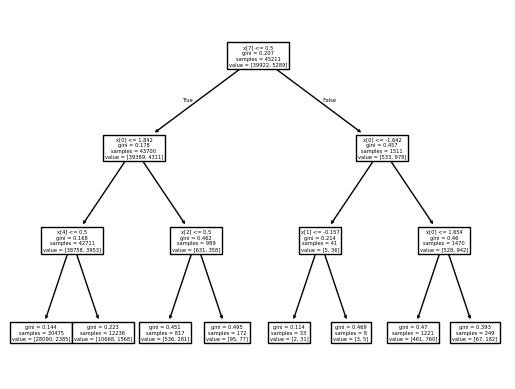

In [218]:
pipeline.fit(X,y)
plot_tree( pipeline.named_steps['clf'])

In [219]:
def precision_vs_recall( threshold ):
  df["prediction"] = df["age"] > threshold
  df['prediction'] = df['prediction'].map({True: 'yes', False: 'no'})
  return metrics.precision_score( df["y"], df["prediction"], pos_label ='yes'), metrics.recall_score( df["y"], df["prediction"], pos_label ='yes')

In [220]:
precisions = []
recalls = []
thresholds = range(25,95)
for threshold in thresholds:
  precision, recall = precision_vs_recall( threshold )
  precisions.append( precision )
  recalls.append( recall )

In [221]:
pr = pd.DataFrame( {
    "threshold": thresholds,
    "precision": precisions,
    "recall": recalls
})

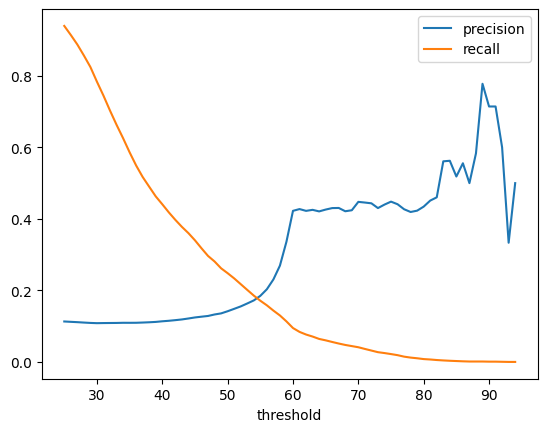

In [222]:
pr.plot( x="threshold", y=["precision","recall"]);

ABOVE PART WAS COPYING THE CODE FROM THE DECISION TREE CLASSIFIER HW, NOW WILL IMPLEMENT RANDOM FOREST CLASSIFIER

In [223]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [224]:
df = pd.get_dummies(df, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [227]:
rf_clf = RandomForestClassifier(random_state=42)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [237]:
random_forest = rf_clf.predict(X_test)

In [239]:

print(f"Accuracy: {accuracy_score(y_test, random_forest)}")


Accuracy: 0.9052639339427897


In [238]:
print("Classification Report:/n", classification_report(y_test, random_forest))

Classification Report:/n               precision    recall  f1-score   support

          no       0.92      0.97      0.95     11966
         yes       0.67      0.39      0.49      1598

    accuracy                           0.91     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.91      0.89     13564



NOW GRID SEARCH CV

In [240]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [247]:
pip install ucimlrepo

In [248]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day_of_week          45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  bool 
 8   job_entrepreneur     45211 non-null  bool 
 9   job_housemaid        45211 non-null  bool 
 10  job_management       45211 non-null  bool 
 11  job_retired          45211 non-null  bool 
 12  job_self-employed    45211 non-null  bool 
 13  job_services         45211 non-null  bool 
 14  job_student          45211 non-null  bool 
 15  job_technician       45211 non-null  bool 
 16  job_unemployed       4

In [254]:
X = bank_marketing.data.features
y = bank_marketing.data.targets

In [256]:
categorical_features = X.select_dtypes(include=['object']).columns
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()  # Create an OrdinalEncoder object
X[categorical_features] = encoder.fit_transform(X[categorical_features])  # Encode categorical features

<ipython-input-256-8a928e28765c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = encoder.fit_transform(X[categorical_features])  # Encode categorical features


In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [258]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']   }

In [260]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),

    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [261]:
best_dt_clf = grid_search.best_estimator_

best_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=20, random_state=42)

In [265]:
y_pred_tuned = best_dt_clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned)}")


Accuracy: 0.897817752875258


In [266]:
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))


Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.96      0.94     11966
         yes       0.58      0.46      0.52      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.71      0.73     13564
weighted avg       0.89      0.90      0.89     13564



In [267]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

Confusion Matrix:
 [[11439   527]
 [  859   739]]
